In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mmm_data/MMM_data.csv')

In [ ]:
display(df)

,TV Manufacturing Brand,DATE,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV)
0,TV Manufacturing & Supplier Unit,1/1/2010,4384,104.9,96.3,106.7,361.62,4240,1533268.80,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909
1,TV Manufacturing & Supplier Unit,1/2/2010,4366,104.9,96.3,106.7,361.62,4266,1542670.92,73.4783,13.298758,105.7133,1369.8913,717.857,114.957,27.8039,111.9091,291.3182,860.1364
2,TV Manufacturing & Supplier Unit,1/3/2010,4006,104.9,96.3,106.7,361.62,4206,1520973.72,80.6093,13.200691,108.7702,1428.0645,653.333,113.090,0.0000,94.6364,282.7273,751.9545
3,TV Manufacturing & Supplier Unit,1/4/2010,4076,104.9,96.3,106.7,361.62,4176,1510125.12,65.9319,12.721429,93.3065,1309.3548,622.095,72.442,0.0000,98.5909,306.3182,749.4545
4,TV Manufacturing & Supplier Unit,1/5/2010,4834,104.9,96.3,106.7,361.62,5234,1892719.08,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,TV Manufacturing & Supplier Unit,2/21/2017,7312,101.4,100.3,103.3,361.62,6974,2521937.88,60.6667,13.488857,76.7250,1399.6615,4168.952,272.036,0.0000,93.9545,222.7727,805.9091
2609,TV Manufacturing & Supplier Unit,2/22/2017,6456,101.4,100.3,103.3,361.62,6123,2214199.26,59.1026,13.206593,78.6058,1369.3491,3984.429,817.581,31.3919,81.9091,225.1818,816.2727
2610,TV Manufacturing & Supplier Unit,2/23/2017,6060,101.4,100.3,103.3,361.62,5989,2165742.18,61.1351,12.775135,76.2872,1341.7297,3943.524,1288.844,31.1817,98.6818,224.5455,855.8636
2611,TV Manufacturing & Supplier Unit,2/24/2017,5980,101.4,100.3,103.3,361.62,5877,2125240.74,53.7865,12.940132,74.9424,1323.5526,5732.000,540.757,31.5487,111.0455,232.8636,791.3636


# Rename columns and correct datatypes

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.rename(columns={
    "TV Manufacturing Brand": "category",
    "DATE": "date",
    "DEMAND ":"demand",
    "Consumer Price Index (CPI)":"consumer_price_index",
    "Consumer Confidence Index(CCI)":"consumer_confidence_index",
    "Producer Price Index (PPI)":"producer_price_index",
    "Unit Price ($)":"unit_price",
    "POS/ Supply Data":"point_of_sale",
    "SALES ($)":"revenue",
    "Advertising Expenses (SMS)":"ad_expense_sms",
    "Advertising Expenses(Newspaper ads)":"ad_expense_newspaper",
    "Advertising Expenses(Radio)":"ad_expense_radio",
    "Advertising Expenses(TV)":"ad_expense_tv",
    "Advertising Expenses(Internet)":"ad_expense_internet",
    "GRP(SMS)":"gross_rating_point_sms",
    "GRP (NewPaper ads)":"gross_rating_point_newspaper",
    "GRP(Radio":"gross_rating_point_radio",
    "GRP(TV)":"gross_rating_point_tv",
    "GRP(Internet)":"gross_rating_point_internet"}, inplace=True)

In [ ]:
print(df[['revenue', 'point_of_sale']])

         revenue  point_of_sale
0     1533268.80           4240
1     1542670.92           4266
2     1520973.72           4206
3     1510125.12           4176
4     1892719.08           5234
...          ...            ...
2608  2521937.88           6974
2609  2214199.26           6123
2610  2165742.18           5989
2611  2125240.74           5877
2612  1976976.54           5467

[2613 rows x 2 columns]


In [ ]:
print(f"Data recorded period : {df.date.min().date()} to {df.date.max().date()}")

Data recorded period : 2010-01-01 to 2017-02-25


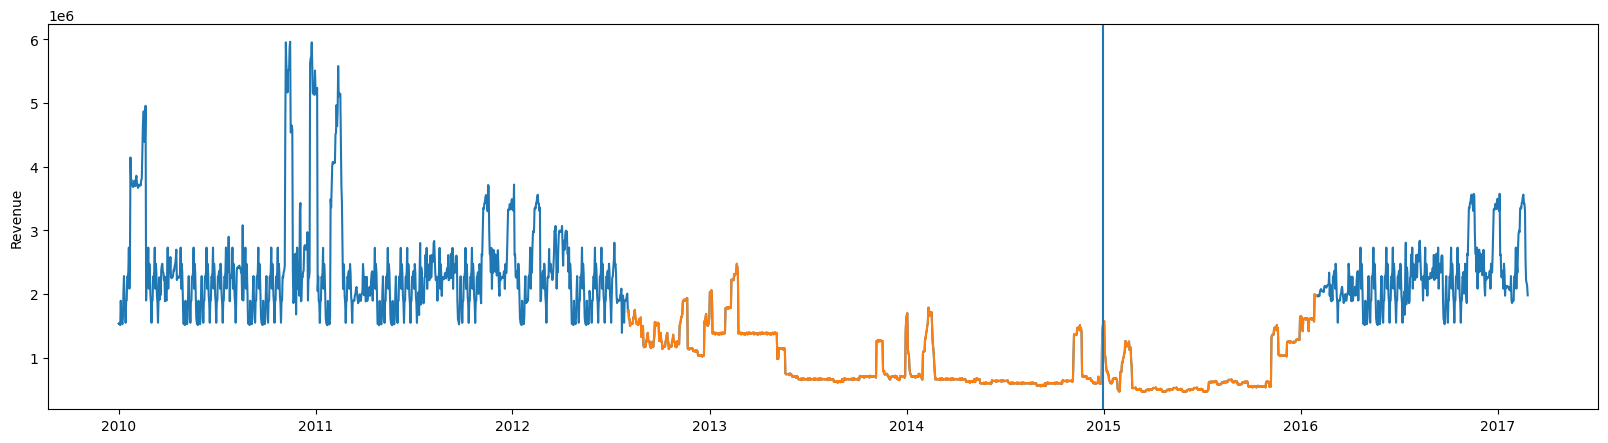

In [ ]:
df['date'] = pd.to_datetime(df['date'])
# df_temp = df[(df.date>datetime.datetime(2012, 1, 1)) & (df.date<datetime.datetime(2016, 1, 31))]
df_temp2 = df[(df.date>datetime.datetime(2012, 8, 1)) & (df.date<datetime.datetime(2016, 1, 31))]
df_temp = df.set_index('date')
df_temp2 = df_temp2.set_index('date')

fig = plt.subplots(figsize=(20, 5))
plt.plot(df_temp.index, df_temp['revenue'])
plt.plot(df_temp2.index, df_temp2['revenue'])
plt.ylabel("Revenue")
# plt.vlines(2015, 0, 5, linestyles ="dashed", colors ="k")
plt.axvline(datetime.datetime(2014, 12, 31))
# plt.axvline(datetime.datetime(2015, 3, 31)).set_linestyle('dashed')
# plt.axvline(datetime.datetime(2015, 6, 30)).set_linestyle('dashed')
# plt.axvline(datetime.datetime(2015, 12, 31)).set_linestyle('dashed')
# plt.axvline(datetime.datetime(2016, 6, 30)).set_linestyle('dashed')
# plt.axvline(datetime.datetime(2017, 2, 25)).set_linestyle('dashed')
plt.show()

# Split train set and test set

In [ ]:
# df_train = df[df.date <= '2015-12-31']
# df_test = df[df.date > '2015-12-31']
df.drop(columns=['point_of_sale'], inplace=True)

df_train = df[df.date <= '2014-12-31']
df_test = df[df.date > '2014-12-31']

In [ ]:
df_train.shape, df_test.shape

((1826, 18), (787, 18))

In [ ]:
# df_train.to_csv('/content/drive/MyDrive/mmm_data/train_data.csv', index=False)
# df_test.to_csv('/content/drive/MyDrive/mmm_data/test_data.csv', index=False)